# **Credit Card Fraud**

This notebook examines classifier solutions for the Credit Card Fraud Dataset, available here:  
https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud

# Business Problems  

The banking industry faces a significant challenge in preventing credit card fraud. According to the Data Breach Index, more than 5 million records are being stolen on a daily basis, a concerning statistic that shows - fraud is still very common both for Card-Present and Card-not Present type of payments. Fraudulent credit card transactions can lead to financial losses, harm to the bank's reputation, and even legal complications. Therefore, detecting and preventing credit card fraud is a critical issue for banks.

Credit card fraud comes in various forms, such as identity theft, account takeover, and counterfeit cards. Fraudsters continually refine their tactics and become more sophisticated, making it difficult for banks to stay ahead of the curve. Traditional methods of detecting fraud, such as manual review, are often unreliable and time-consuming.

Fortunately, we are seeking to add a fraud classifier for credit card companies to serve as an aid to quickly indentify frauds. High speed fraud detection is crucial here as it would be hard to trace back the amount after the transaction.  

False negatives are fraud cases we identify as normal transactions, which will lead to a loss for the company or the customer. False positives are normal transaction cases we identify as a fraud, which would cause transactions being denied and might create dissatisfaction from customers.

# Metrics

We will primarily consider accuracy, which assesses the overall percentage of error, and recall assesses the rate at which instances that are truly positive (fraud) are correctly classified. While we want a high accuracy, we would also want a possibly small loss due to mis-recognition on fraud and less disturbe to customers' non-fraud transaction. Therefore, we choose f1 score as a complementary metric. 

# Data

This notebook examines classifier solutions for the Credit Card Fraud Dataset, available here:  
https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud

Feature Explanation:

distance_from_home - the distance from home where the transaction happened.

distance_from_last_transaction - the distance from last transaction happened.

ratio_to_median_purchase_price - Ratio of purchased price transaction to median purchase price.

repeat_retailer - Is the transaction happened from same retailer.

used_chip - Is the transaction through chip (credit card).

used_pin_number - Is the transaction happened by using PIN number.

online_order - Is the transaction an online order.

fraud - Is the transaction fraudulent.


# import data

In [155]:
import pandas as pd

In [156]:
#filename = "drive/My Drive/Colab Notebooks/card_transdata.csv"
filename = "card_transdata.csv"
df_original = pd.read_csv(filename)

In [157]:
df_original.shape

(1000000, 8)

# data preprocessing

### take examples and detection

In [158]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [159]:
df_original["fraud"].mean()

0.087403

In [160]:
# take 5000 examples
# as we can see, the original data is imbalanced
# using a small sample and SMOTE it is wasting the original large sample
# so I balance it manually

df1 = df_original[df_original['fraud'] == 0].sample(n=2500)
df2 = df_original[df_original['fraud'] == 1].sample(n=2500)
df = pd.concat([df1, df2])
df = df.reset_index()
df = df.drop('index', axis=1)

In [161]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              5000 non-null   float64
 1   distance_from_last_transaction  5000 non-null   float64
 2   ratio_to_median_purchase_price  5000 non-null   float64
 3   repeat_retailer                 5000 non-null   float64
 4   used_chip                       5000 non-null   float64
 5   used_pin_number                 5000 non-null   float64
 6   online_order                    5000 non-null   float64
 7   fraud                           5000 non-null   float64
dtypes: float64(8)
memory usage: 312.6 KB


In [162]:
df['fraud'].mean()

0.5

In [163]:
# missing values / no missing values
df.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [164]:
# duplicates / no dups
df.duplicated().sum()

0

In [165]:
# Feature Types
quant_features = ['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price']
categorical_features = ['repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order']
target = ['fraud']

In [166]:
# quant feature summary
df[quant_features].describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,5000.0,45.991195,104.382362,0.077836,4.428386,12.325994,37.838120,2218.212758
distance_from_last_transaction,5000.0,9.804239,58.093590,0.003039,0.329236,1.077493,3.759500,2938.197853
ratio_to_median_purchase_price,5000.0,3.756821,5.108633,0.021329,0.675186,1.913397,5.238212,146.213898


In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

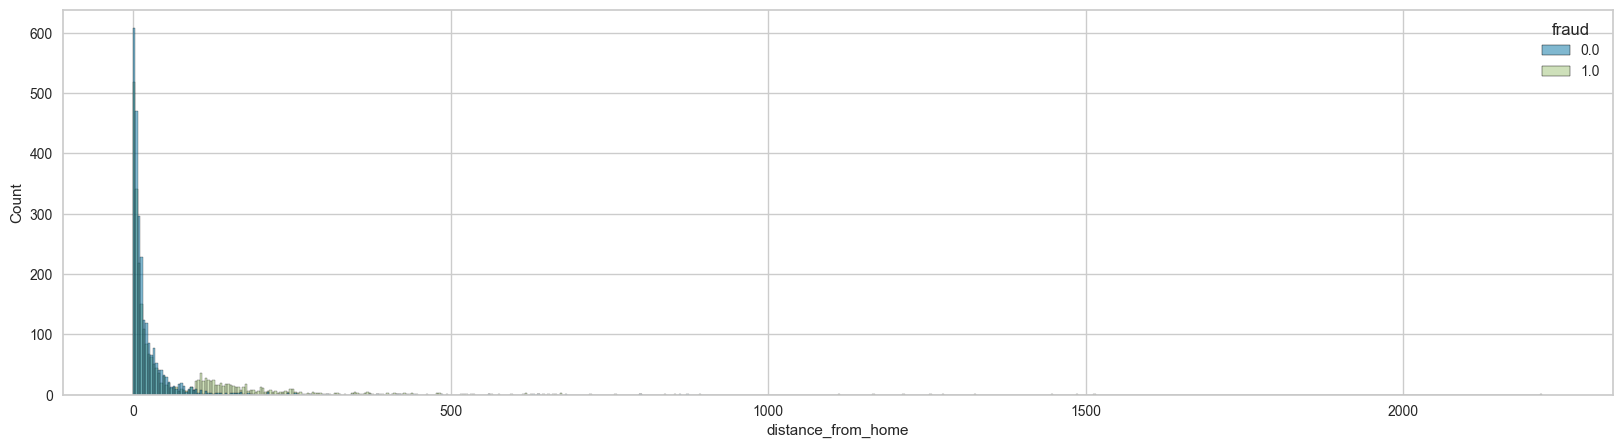

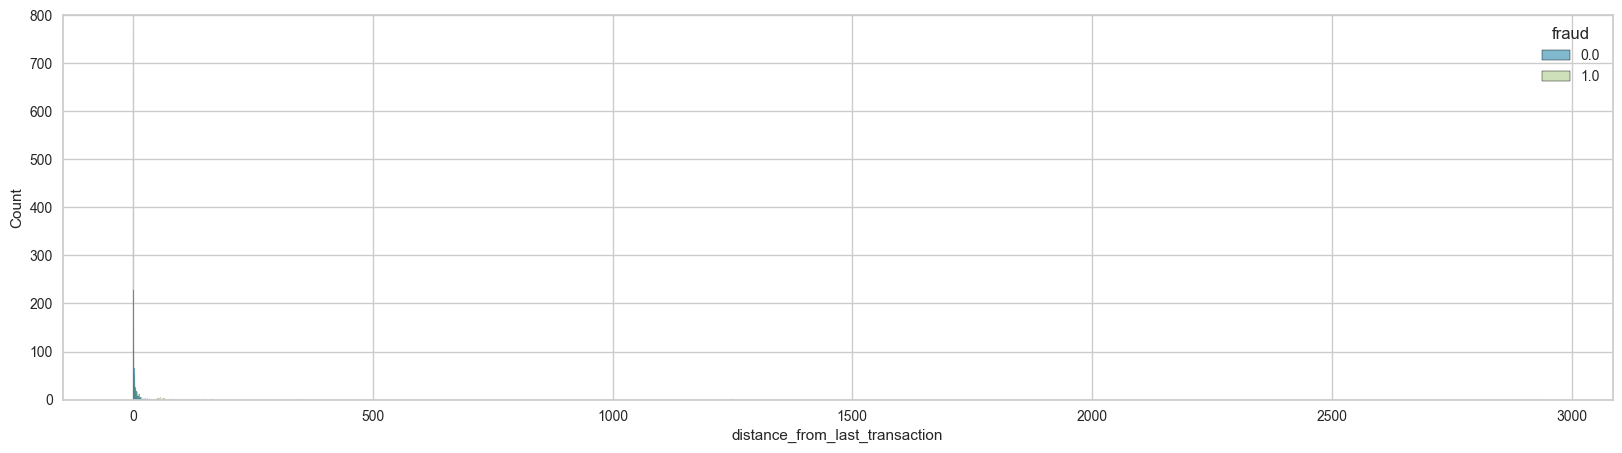

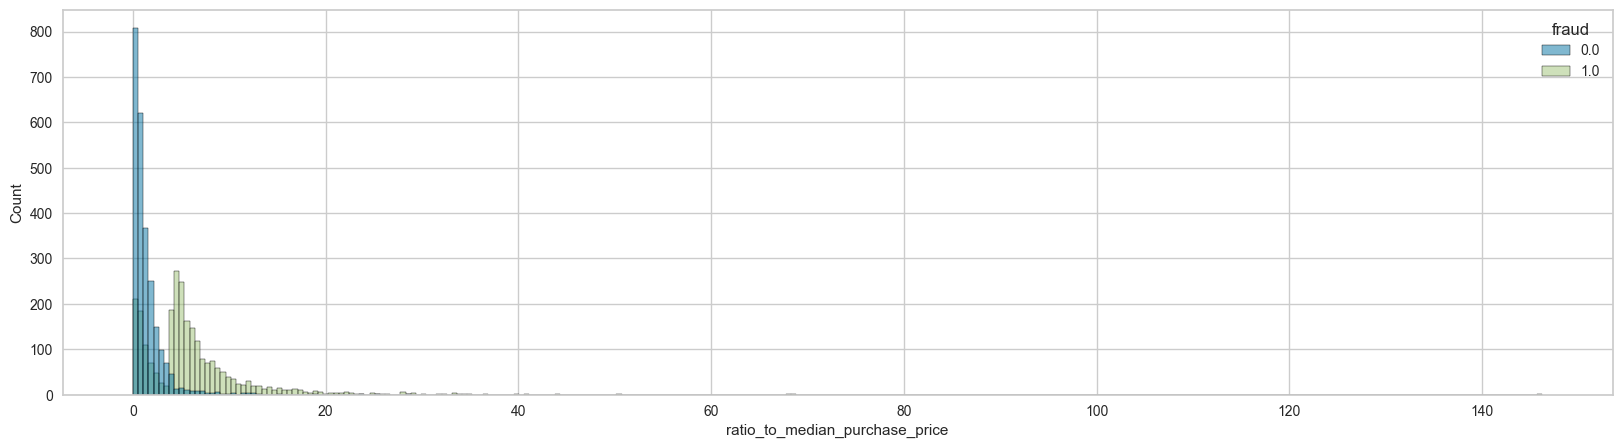

In [168]:
# see the quant features' distribution
# it's clear that skewness exist in quant features
# but we'll not correct it 
# because the skewness is more like a useful pattern rather than a sample error
 
for qf in quant_features:
    plt.figure(figsize = (20,5))
    sns.histplot(x = qf, hue = "fraud", data = df)
    plt.show()

In [207]:
# but, still, it will help if we calculate the log of the both distances
# the ratio should also be logged, although it's a ratio itself
# the larger the data scale, the smaller the influence of 1

for qf in quant_features:
    df[qf] = np.log(df[qf])

df[quant_features].head()



,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price
0,1.087386,-0.005241,0.082284
1,1.772723,-0.501606,0.611080
2,3.137471,2.563678,-3.096814
3,0.779804,-0.311009,0.686656
4,4.734619,-0.785303,0.314613


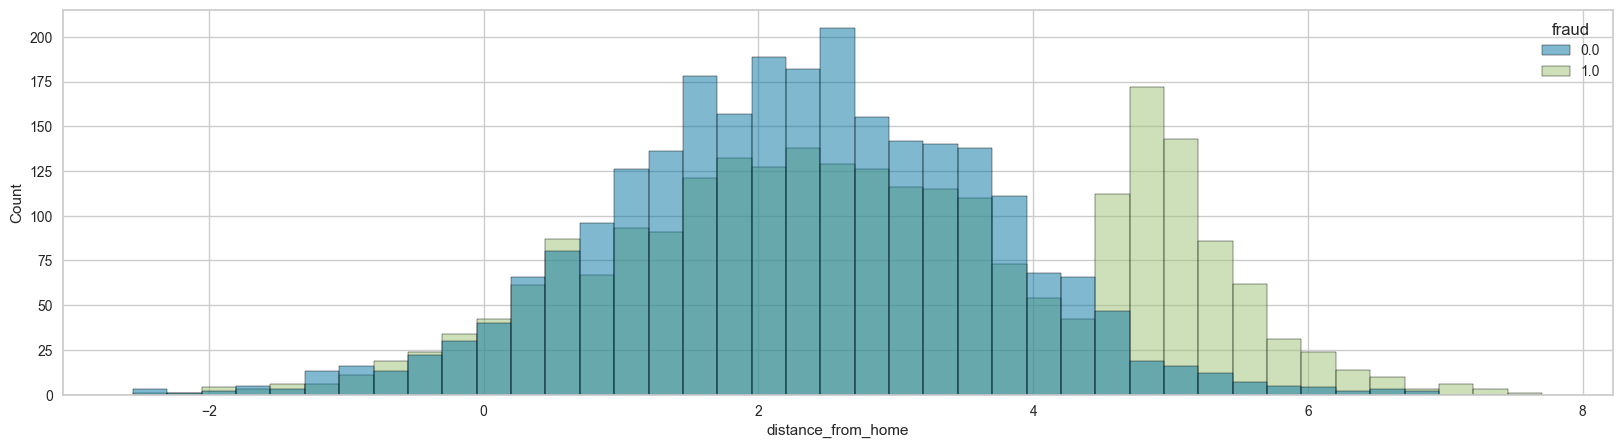

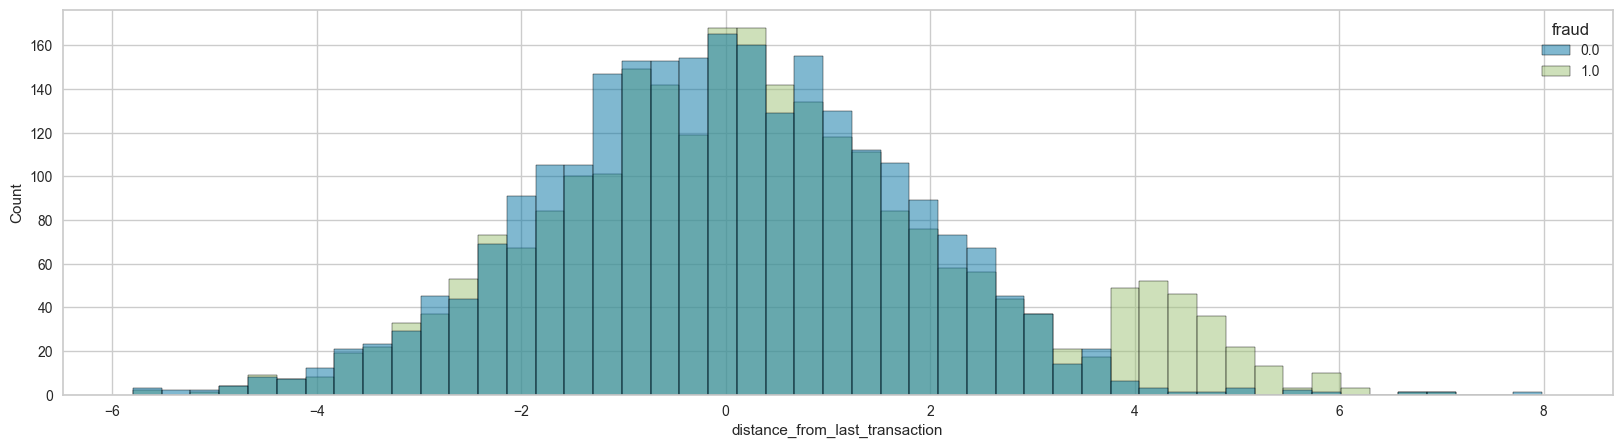

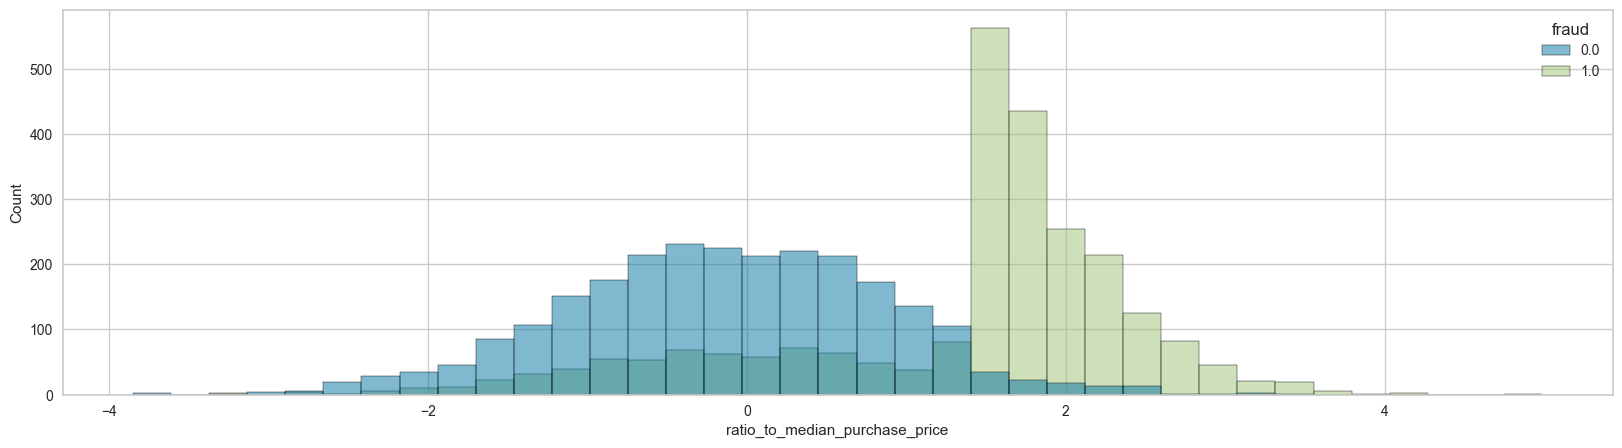

In [218]:
for qf in quant_features:
    plt.figure(figsize = (20,5))
    sns.histplot(x = qf, hue = "fraud", data = df)
    plt.show()

# Samples and Features
### Feature Selection for c-features

In [208]:
# to avoid model's exposure to test data, we choose to split it before other preprocessing
cols = list(df.columns)
X = df[cols[: -1]]
y = df[target]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                                    X, y, 
                                                    test_size=0.2,    # 80-20 training vs test set split
                                                    random_state=0, 
                                                    stratify=y)

Text(0.5, 1.0, 'Feature importance for classification dataset')

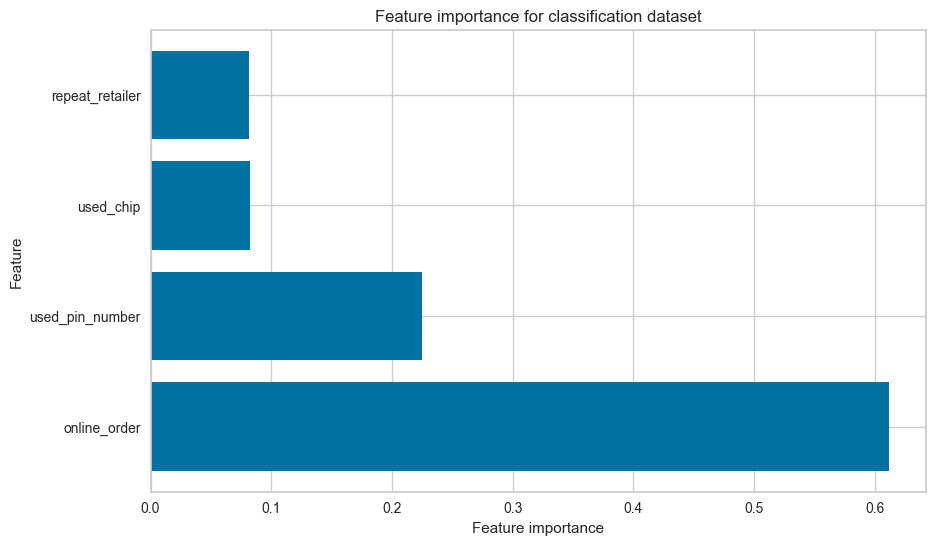

In [209]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
# Feature Importance

# Initialize the Random Forest Classifier
rfc = RandomForestClassifier()

# Train the model on your dataset
rfc.fit(X_train[categorical_features], y_train)

# Extract feature importances from the model
importances = rfc.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Create a bar chart of feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(X_train[categorical_features].shape[1]), importances[indices], align='center')
plt.yticks(range(X_train[categorical_features].shape[1]), X_train[categorical_features].columns[indices])
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.title("Feature importance for classification dataset")

In [210]:
# from the barchart above, we see clearly that the most import feature is online_order
# but two of them are not so important
# so we discard them

categorical_features_chosen = ['used_pin_number', 'online_order']

### Scaling and Feature Extraction for q-features

In [211]:
# for q-features, we want to denoise the data while preserve as much info as possible
# so we don't select the features directly but choose PCA

In [219]:
X_train_q = X_train[quant_features]
X_test_q = X_test[quant_features]

In [220]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()  
X_train_q_std = stdsc.fit_transform(X_train_q)
X_test_q_std = stdsc.transform(X_test_q)

In [221]:
# three features are (nearly) equally important, no selection needed
from sklearn.decomposition import PCA

pca = PCA()
X_train_q_pca = pca.fit_transform(X_train_q_std)
X_test_q_pca = pca.transform(X_test_q_std)

pca.explained_variance_ratio_

array([0.36813464, 0.33746186, 0.2944035 ])

# Synthesize X

In [222]:
X_train_q_pca = pd.DataFrame(X_train_q_pca)
X_test_q_pca = pd.DataFrame(X_test_q_pca)

In [223]:
X_train = X_train.reset_index()
X_train = X_train.drop("index", axis = 1)
X_train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,1.589246,-2.752385,-0.062871,1.0,0.0,0.0,1.0
1,2.162973,-1.227291,0.544414,1.0,1.0,0.0,0.0
2,3.259046,2.721825,-0.962183,1.0,0.0,0.0,1.0
3,2.337428,0.977762,1.745024,1.0,0.0,0.0,0.0
4,0.310240,-0.826092,1.441775,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
3995,1.006269,1.691427,1.394834,1.0,1.0,0.0,1.0
3996,2.407558,1.350639,0.147552,1.0,0.0,0.0,0.0
3997,3.802332,-0.645117,-0.264844,1.0,0.0,0.0,0.0
3998,1.967826,1.348321,1.486798,1.0,0.0,0.0,1.0


In [224]:
X_test = X_test.reset_index()
X_test = X_test.drop("index", axis = 1)
X_test

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,2.478141,1.031150,3.255472,1.0,0.0,0.0,1.0
1,3.566180,1.022992,1.689327,1.0,1.0,0.0,1.0
2,2.532104,2.680321,-0.057069,1.0,0.0,0.0,0.0
3,3.440913,3.681632,0.144140,1.0,0.0,0.0,0.0
4,2.497736,0.336553,-0.658626,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
995,1.188168,-1.866302,1.429372,1.0,0.0,0.0,1.0
996,3.436663,-1.673372,2.799717,1.0,0.0,0.0,1.0
997,2.265037,0.522863,-0.981755,1.0,1.0,0.0,0.0
998,3.028792,-0.246170,0.537515,1.0,1.0,0.0,0.0


In [226]:
x_train = X_train_q_pca.copy()
x_train[categorical_features_chosen] = X_train[categorical_features_chosen]
x_train

,0,1,2,used_pin_number,online_order
0,0.067700,-1.183245,1.258607,0.0,1.0
1,-0.077564,-0.630054,0.450340,0.0,0.0
2,1.020677,1.544814,0.098054,0.0,1.0
3,-0.753219,0.160368,-0.605597,0.0,0.0
4,-1.406651,-0.456355,0.709838,0.0,0.0
...,...,...,...,...,...
3995,-1.196839,0.721462,0.018995,0.0,1.0
3996,0.114695,0.701784,0.119879,0.0,0.0
3997,1.059506,-0.320350,0.072273,0.0,0.0
3998,-0.798861,0.437583,-0.378546,0.0,1.0


In [227]:
x_test = X_test_q_pca.copy()
x_test[categorical_features_chosen] = X_test[categorical_features_chosen]
x_test

,0,1,2,used_pin_number,online_order
0,-1.501688,-0.172674,-1.447012,0.0,1.0
1,-0.176226,0.074580,-1.105621,0.0,1.0
2,0.213100,1.388879,-0.049930,0.0,0.0
3,0.461416,1.744968,-0.705160,0.0,0.0
4,0.637631,0.379626,0.663222,0.0,1.0
...,...,...,...,...,...
995,-0.955147,-1.050252,0.517385,0.0,1.0
996,-0.693107,-1.489857,-1.169292,0.0,1.0
997,0.697218,0.567814,0.896157,0.0,0.0
998,0.263967,-0.232058,-0.076814,0.0,0.0


In [236]:
cols = list(x_train.columns)
columns = {}
for col in cols:
    if(type(col) == type(0)):
        columns[col] = "PCA" + str(col)

x_train = x_train.rename(columns = columns)
x_test = x_test.rename(columns = columns)

# Model Selection and Hyperparameter Tuning

We choose a classic classifier(Logistic Regression), a lazy learning algorithm(KNN) and a boosting algorithm(XGBoost) as candidates.

After holding out a validation set, we conduct hyperparameter tuning with grid search or randomized search to get best parameters.

Then with K-fold cross validation we select a model with best performance among them.

### Logistic Regression Hyperparameter Tuning with K-fold Cross Validation

In [244]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# useful parameters
param_c = [0.001, 0.01, 0.1, 1, 10, 100]
penalty = ["l1", "l2"]

# set up param_grid
param_grid = [{
                "C": param_c,
                "penalty": penalty
}]

# set up model
lr = LogisticRegression(
                        solver = 'lbfgs',
                        max_iter = 1000,
                        tol = 1e-5,
                        random_state = 1
)

# GridSearch
gs = GridSearchCV(
                    estimator = lr,
                    param_grid = param_grid,
                    scoring = 'accuracy',
                    refit = True,
                    cv = 4,
                    n_jobs = -1
)

gs = gs.fit(x_train, y_train)

# check results
print(gs.best_score_)
print(gs.best_params_)

0.849
{'C': 10, 'penalty': 'l2'}


In [245]:
# test the best model

lr = LogisticRegression(
                        C = 10,
                        penalty = "l2",
                        solver = 'lbfgs',
                        max_iter = 1000,
                        tol = 1e-5,
                        random_state = 1
)
lr.fit(x_train, y_train)

print("n_iter =", lr.n_iter_)

lr.score(x_test, y_test)

n_iter = [21]


0.854

### KNN Hyperparameter Tuning with K-fold Cross Validation

In [247]:
from sklearn.neighbors import KNeighborsClassifier

# useful parameters
param_n = range(1, 15)
p = range(1, 4)

# set up param_grid
param_grid = [{
                "n_neighbors": param_n,
                "p": p
}]

# set up model
knn = KNeighborsClassifier()

# GridSearch
gs = GridSearchCV(
                    estimator = knn,
                    param_grid = param_grid,
                    scoring = 'accuracy',
                    refit = True,
                    cv = 4,
                    n_jobs = -1
)

gs = gs.fit(x_train, y_train)

# check results
print(gs.best_score_)
print(gs.best_params_)

0.9609999999999999
{'n_neighbors': 3, 'p': 2}


In [248]:
knn = KNeighborsClassifier(
                            n_neighbors = 3,
                            p = 2,
                            n_jobs = -1
                        )

knn.fit(x_train, y_train)

knn.score(x_test, y_test)

0.97

### XGBoost Hyperparameter Tuning with K-fold Cross Validation

In [253]:
from xgboost import XGBClassifier

param_grid = {
    'max_depth': [4, 5, 6, 7],
    'n_estimators': [100, 150, 200, 250],
    'learning_rate': [0.05, 0.1, 0.15, 0.2]
}

xgb = XGBClassifier()

gs = GridSearchCV(
                    estimator = xgb,
                    param_grid = param_grid,
                    scoring = 'accuracy',
                    refit = True,
                    cv = 4,
                    n_jobs = -1
)

gs = gs.fit(x_train, y_train)

# check results
print(gs.best_score_)
print(gs.best_params_)

0.9652499999999999
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [254]:
xgb = XGBClassifier(
    learning_rate = 0.1,
    max_depth = 5,
    n_estimators = 200
)

xgb.fit(x_train, y_train)

xgb.score(x_test, y_test)

0.966

### F1 Score

We could clearly see from the data above, XGBoost and KNN shows similar accuracy. As the computing cost of KNN could grow faster than XGB, and we have a large dataset, we would prefer XGB model.

Calculate F1 score to double check the performance of XGB model.

In [257]:
from sklearn.metrics import f1_score

print("KNN:")

y_pred = knn.predict(x_test)
print(f1_score(y_test, y_pred))

print("XGB:")

y_pred = xgb.predict(x_test)
print(f1_score(y_test, y_pred))


KNN:
0.9705882352941176
XGB:
0.966403162055336


# Final Model

In [260]:
x = pd.concat([x_train, x_test])
y = pd.concat([y_train, y_test])

In [262]:
xgb = XGBClassifier(
    learning_rate = 0.1,
    max_depth = 5,
    n_estimators = 200
)

xgb.fit(x, y)

print(xgb.feature_importances_)

[0.14966905 0.07215682 0.25485036 0.17492558 0.34839824]
